# Tool Architecture

Contextualizing the problem in ML
To contextualize the problem, this has been divided into goals, each goal contextualized in a different area of requirements engineering.
- Goal 1.	Support Change-Impact Analysis.
- Goal 2.	Domain mapping and ontology creation.
    - a.	Requirement analysis.
- Goal 3.	Trace or elicit safety-related aspects from existing norms and standards.
    - a.	Requirement elicitation.
- Goal 4.	Facilitating effective tracing, reuse, and analysis of system requirements to prevent safety violations.
    - a.	Classify safety violations.


# Import Data

The dataset originates from PURE, a requirements collection formatted in XML. All XML files share a standard namespace called 'req_document.xsd,' simplifying the development of a function to parse the XML files into a dataframe. This dataframe includes columns for the relevant XML tags, indicating whether the text corresponds to a requirement or information, the XML tree of the entry (or path), and the associated ID, that stands for the requirement number.

TODO: 
- Missing test of quality with other sources
- Import all in folder into instances of classes


In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import string
import re
import nltk
import pprint
from utils import parse_xml

print(sys.version)
print(sys.executable)


# Specify the path to your XML filec
xml_file_path = r'C:\dev\NLP-Sandbox\PURE\requirements-xml\0000 - cctns.xml'

# Define the namespace
namespace = {'ns': 'req_document.xsd'}

# import utils.ParseXML as ParseXML
df = parse_xml.process_xml_with_namespace(xml_file_path, namespace)
df.head(30)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\python.exe


,tag,text,id,path
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title
4,version,1.0,,req_document/version
5,title,INTRODUCTION,1,req_document/p/title
6,title,The Functional Requirements Specifications (FR...,,req_document/p/text_body
7,title,FUNCTIONAL OVERVIEW,2,req_document/p/title
8,title,CCTNS V1.0 functionality is designed to focus ...,,req_document/p/text_body
9,title,DESCRIPTION OF THE MODULES AND FUNCTIONAL REQU...,3,req_document/p/title


# Clean Data
Having retrieved the text in the XML file to a workable format (dataframes), it is necessary to cleanup and tokenize the text.
This is not as straightforward as it might seem since care is needed to preserve special words such as those separated by hyphens (e-governance, non-functional, …). 


First, let’s tokenize the documents, remove common words as well as words that only appear once in the corpus:

## Remove punctiation, Tokenization and remove stopwords


In [2]:
from utils import clean_data
df['text_clean'] = df['text'].apply(lambda x: clean_data.clean_text(x.lower(),False,False))

# Display the sub-dataframe
df.head()

,tag,text,id,path,text_clean
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,"[e-governance, mission, mode, project, mmp]"
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title,"[crime, criminal, tracking, network, and, syst..."
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title,"[functional, requirements, specification, v1, ..."
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,"[ministry, of, home, affairs, government, of, ..."
4,version,1.0,,req_document/version,"[1, 0]"


## Lemmatizing

- See how the lemmatizing function reacts to erros, abbreviations and non indexed words

DAL ( Development Assurance Levels or Design Assurance Levels ) 
IDAL ( Item Development Assurance Levels used for the software )
Automotive Safety Integrity Level (ASIL)
ECSS-Q-ST-40 ( Safety )

In [3]:
# Assuming you have some form of tokenized_text
uncommon_words = ["Devel", "Assurance", "DAL", "SIL", "ECSS-Q-ST-40"]

for word in uncommon_words:
    print(clean_data.lemmatizing([word]))


df['text_clean_lemma'] = df['text_clean'].apply(lambda x: clean_data.lemmatizing(x))

# Display the sub-dataframe
df.head(20)


['Devel']
['Assurance']
['DAL']
['SIL']
['ECSS-Q-ST-40']


,tag,text,id,path,text_clean,text_clean_lemma
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,"[e-governance, mission, mode, project, mmp]","[e-governance, mission, mode, project, mmp]"
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title,"[crime, criminal, tracking, network, and, syst...","[crime, criminal, tracking, network, and, syst..."
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title,"[functional, requirements, specification, v1, ...","[functional, requirement, specification, v1, 0..."
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,"[ministry, of, home, affairs, government, of, ...","[ministry, of, home, affair, government, of, i..."
4,version,1.0,,req_document/version,"[1, 0]","[1, 0]"
5,title,INTRODUCTION,1,req_document/p/title,[introduction],[introduction]
6,title,The Functional Requirements Specifications (FR...,,req_document/p/text_body,"[the, functional, requirements, specifications...","[the, functional, requirement, specification, ..."
7,title,FUNCTIONAL OVERVIEW,2,req_document/p/title,"[functional, overview]","[functional, overview]"
8,title,CCTNS V1.0 functionality is designed to focus ...,,req_document/p/text_body,"[cctns, v1, 0, functionality, is, designed, to...","[cctns, v1, 0, functionality, is, designed, to..."
9,title,DESCRIPTION OF THE MODULES AND FUNCTIONAL REQU...,3,req_document/p/title,"[description, of, the, modules, and, functiona...","[description, of, the, module, and, functional..."


## POS Tagging

In [4]:
import spacy
from spacy import displacy
from nltk import word_tokenize

text = "This is one simple example."
tokens = word_tokenize(text)
tags = nltk.pos_tag(tokens, tagset = "universal")
print(tags)

df['POS'] = df['text_clean_lemma'].apply(lambda x: nltk.pos_tag(x, tagset = "universal"))

df.head()

# Display phrase and the POS tag and relationship
if False:
    nlp = spacy.load("en_core_web_sm")
    for line in df["text"]:
        doc = nlp(line)
        options = {"compact": True, "color": "blue"}
        displacy.render(doc, style = "dep",options=options, jupyter=True)
    pass

[('This', 'DET'), ('is', 'VERB'), ('one', 'NUM'), ('simple', 'ADJ'), ('example', 'NOUN'), ('.', '.')]


# Concordance / Ontology

GOALS:
- User curated onthology of special terms in context of the requirements domain

A concordance is an alphabetical list of the principal words used in a book or body of work, listing every instance of each word with its immediate context. Historically, concordances have been compiled only for works of special importance, such as the Vedas,[1] Bible, Qur'an or the works of Shakespeare, James Joyce or classical Latin and Greek authors,[2] because of the time, difficulty, and expense involved in creating a concordance in the pre-computer era.

An ontology is a formal description of concepts in a domain of discourse. It constitutes a knowledge base. In reality, there is a fine line where the ontology ends and the knowledge base begins. A domain-specific ontology is used to constrain requirements semantically. In requirements specification, using ontologies helps to restrict the vocabulary to entities, properties, and property relationships which are semantically related.[1]
In practical terms, developing an ontology includes: defining concepts as classes, arranging the classes in a taxonomic (subclass–superclass) hierarchy, defining properties (slots) and describing allowed values for these properties.
Ontology represents the knowledge of a domain i.e., concepts that exist in the real world and defines entities of the domain and relationships between entities of the domain. The cornerstone of an ontology rests on the hierarchy of concepts (Guarino et al. 2009).
“Ontology represents the knowledge of a domain i.e., concepts that exist in the real world and defines entities of the domain and relationships between entities of the domain. The cornerstone of an ontology rests on the hierarchy of concepts (Guarino et al. 2009).” (Antοniou and Bassiliades, 2024, p. 8)“

“Linguistics-based techniques are applicable to almost all tasks in ontology learning and are mainly dependent on natural language processing tools. Some of the techniques include part-of-speech tagging, sentence parsing, syntactic structure analysis, and dependency analysis. Other techniques rely on the use of semantic lexicon, lexico-syntactic patterns, semantic templates, subcategorization frames, and seed words.” (Wong et al., 2012, p. 9)
There are five types of output in ontology learning, namely, terms, concepts, taxonomic relations, non-taxonomic relations, and axioms.
Terms are used to form concepts which in turn are organized according to relations. Relations can be further generalized to produce axioms. Terms can be simple (i.e., single word) or complex (i.e., multi word), and are considered as lexical realizations of everything important and relevant to a domain. The main tasks associated with terms are to preprocess texts and extract terms and typically begins with tokenization or part-of-speech tagging to break texts into smaller constituents. 
Part-of-speech tagging and sentence parsing provide the syntactic structures and dependency information required for further linguistic analysis in order to uncover terms and relations. Syntactic structure analysis and dependency analysis examines syntactic and dependency information to uncover terms and relations at the sentence level.(Wong et al., 2012, p. 9)
A concept can be anything about which something is said. Concepts are formed by grouping similar terms. The main tasks are therefore to form concepts and label concepts. The task of forming concepts involves discovering the variants of a term and grouping them together. Term variants can be determined using predefined background knowledge, syntactic structure analysis, or through clustering based on some similarity measures.
Axioms are propositions or sentences that are always taken as true. Axioms act as a starting point for deducing other truth, verifying correctness of existing ontological elements, and defining constraints. The task of learning axioms involves the generalization or deduction of a large number of known relations that satisfy certain criteria. (Wong et al., 2012, p. 7)
The use of seed words (i.e., seed terms) is a common practice in many systems for guiding a wide range of tasks in ontology learning. Bootstrapping is a popular approach used to kickstart the construction of ontologies based on some user-provided resources in the form of seeds. A combination of these preceding techniques is then used to extend the seeds. Seed words provide good starting points for the discovery of additional terms relevant to that particular domain (Wong et al., 2012, p. 10).

## Create attribute with only 'name' POS tags

One way found to retrieve meaning from the bag of words (BOW) is to extract all nouns that are present.

In [21]:
from collections import Counter

def extract_nouns(word_pos_list):
    nouns = [word for word, pos in word_pos_list if pos.startswith('NOUN')]
    return nouns

# Apply extract_nouns function to each row of the 'POS' column
noun_lists = df['POS'].apply(extract_nouns)

# Flatten the list of nouns
all_nouns = [noun for sublist in noun_lists for noun in sublist]

# Count the occurrences of each noun
noun_counts = Counter(all_nouns)

# Convert the counter to a DataFrame if needed
concordance_df = pd.DataFrame.from_dict(noun_counts, orient='index', columns=['Count'])

# Rename the index column to "Noun"
concordance_df = concordance_df.rename_axis('Noun')

# Add a new column with default Boolean value (default to True/1)
concordance_df['Applicable'] = True

noun_freq = 6

# Change 'Applicability' to False for rows where 'ID' is less than or equal to noun_freq
concordance_df.loc[concordance_df['Count'] <= noun_freq, 'Applicable'] = False

# Sort the DataFrame by the 'count' attribute in descending order
concordance_df = concordance_df.sort_values(by='Count', ascending=False)

pprint.pprint(concordance_df[concordance_df['Applicable']])



               Count  Applicable
Noun                            
user              86        True
system            84        True
page              49        True
case              32        True
interface         28        True
information       28        True
application       25        True
access            24        True
navigation        24        True
content           21        True
police            20        True
link              20        True
action            18        True
data              17        True
functionality     15        True
search            15        True
requirement       13        True
module            13        True
use               13        True
window            12        True
cctns             12        True
error             12        True
audit             11        True
group             11        True
component         11        True
profile           10        True
trail             10        True
record             9        True
text      

### Wordcloud from the results

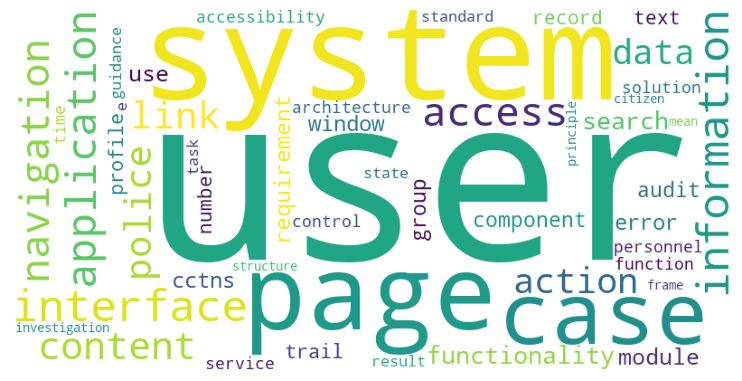

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Applicable' is True
filtered_df = concordance_df[concordance_df['Applicable'] == True]

# Create a dictionary from DataFrame index (Noun) and values (Count)
word_freq = filtered_df['Count'].to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
plt.show()


# Model

## TFIDF
TF-IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa.

Among the words, tf-idf gives the highest weight to the rarer words. This is how to use the tf-idf to indicate the importance of words or terms inside a collection of documents.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Calculate TF-IDF

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text in df to compute TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# get idf values and feature names
print('\nidf values:')
for ele1, ele2 in zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_):
    print(ele1, ':', ele2)





idf values:
00 : 5.350277936359301
10 : 4.944812828251137
110 : 5.350277936359301
12 : 5.350277936359301
14 : 5.350277936359301
14915 : 5.350277936359301
15 : 4.944812828251137
16 : 5.350277936359301
17 : 5.350277936359301
171 : 4.944812828251137
20 : 4.657130755799356
303 : 5.350277936359301
9241 : 4.097514967863933
a1 : 5.350277936359301
a7 : 5.350277936359301
ability : 4.944812828251137
able : 3.5585184671312464
about : 4.251665647691191
above : 5.350277936359301
acceptable : 4.944812828251137
acceptance : 5.350277936359301
access : 2.9523826635609307
accessed : 4.657130755799356
accessibility : 4.657130755799356
accessible : 4.657130755799356
accompanied : 5.350277936359301
according : 5.350277936359301
account : 4.251665647691191
accused : 5.350277936359301
achieved : 4.944812828251137
achieving : 4.944812828251137
acknowledgements : 5.350277936359301
act : 5.350277936359301
acted : 5.350277936359301
action : 4.433987204485146
actions : 3.740840023925201
activated : 5.35027793635

In [8]:
# Rename the index column to "Noun"
#concordance_df = concordance_df.rename_axis('Noun')

# Get feature names (words) from TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out().tolist()

# Step 2: Calculate TF-IDF scores for each noun in concordance_df['Noun']

# Create a new column 'TF-IDF_score' in concordance_df and initialize it with NaN
concordance_df['TF-IDF_score'] = float(0)

# Iterate over each row in the DataFrame
for noun, row in concordance_df.iterrows():
    # Check if the noun is present in the feature names
    if noun in feature_names:
        # Get the index of the noun in the feature names
        index_ = feature_names.index(noun)
        # Get the TF-IDF score for the noun from the TF-IDF matrix
        tfidf_score = tfidf_matrix[:, index_].toarray().mean()  # Take the mean TF-IDF score across all documents
        # Update the corresponding cell in the 'TF-IDF_score' column with the TF-IDF score
        concordance_df.at[noun, 'TF-IDF_score'] = tfidf_score

# Display the updated DataFrame
print(concordance_df)

               Count  Applicable  TF-IDF_score
Noun                                          
a1                 1       False      0.000999
ability            3       False      0.002241
access            24        True      0.026573
accessibility      8        True      0.004606
account            6        True      0.004941
...              ...         ...           ...
www                1       False      0.002408
x                  1       False      0.000000
xx                 1       False      0.007059
xxx                1       False      0.001715
year               1       False      0.001715

[466 rows x 3 columns]


In [9]:
def set_applicable_false(concordance_df, words):
    """
    Set the 'Applicable' column to False for the given word(s) in the DataFrame.

    Parameters:
    - concordance_df: DataFrame containing the 'Applicable' column
    - words: A single word or a list of words to set 'Applicable' to False
    """
    # If a single word is provided, convert it to a list
    if not isinstance(words, list):
        words = [words]

    # Iterate over the words and set 'Applicable' to False
    for word in words:
        concordance_df.loc[word, 'Applicable'] = False

# Example usage:
# If you want to set 'Applicable' to False for multiple words, provide them as a list
words_to_exclude = ['user', 'system', 'access','application','module','functionality','navigation','interface','page','text','data']
set_applicable_false(concordance_df, words_to_exclude)


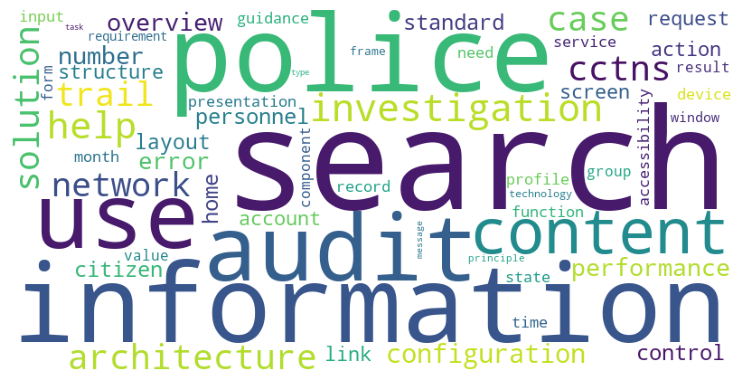

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Applicable' is True
filtered_df = concordance_df[concordance_df['Applicable'] == True]

# Create a dictionary from DataFrame index (Noun) and values (TF-IDF_score)
word_freq = filtered_df['TF-IDF_score'].to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
plt.show()


## Vectorization
N-Grams is captures norms in context “ISO 924114”.

###  CountVectorizer

In [11]:
df.head()

,tag,text,id,path,text_clean,text_clean_lemma,POS
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,"[e-governance, mission, mode, project, mmp]","[e-governance, mission, mode, project, mmp]","[(e-governance, ADJ), (mission, NOUN), (mode, ..."
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title,"[crime, criminal, tracking, network, and, syst...","[crime, criminal, tracking, network, and, syst...","[(crime, NOUN), (criminal, NOUN), (tracking, V..."
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title,"[functional, requirements, specification, v1, ...","[functional, requirement, specification, v1, 0...","[(functional, ADJ), (requirement, NOUN), (spec..."
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,"[ministry, of, home, affairs, government, of, ...","[ministry, of, home, affair, government, of, i...","[(ministry, NOUN), (of, ADP), (home, NOUN), (a..."
4,version,1.0,,req_document/version,"[1, 0]","[1, 0]","[(1, NUM), (0, NUM)]"


In [12]:
from utils import clean_data
from sklearn.feature_extraction.text import CountVectorizer


# Analysier paramether we can pass a function to clean the text
count_vect = CountVectorizer(analyzer=clean_data.clean_text_original)
X_counts = count_vect.fit_transform(df['text'])

# This will output ("how many rows where analysied", "How many unique words there are")
print(X_counts.shape)
print(count_vect.get_feature_names_out())

# FIXME:  individual characters being tokenized as features.

(154, 37)
[' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g'
 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y'
 'z']


### Vectorizers output sparse matrices

X_counts_sample is a _**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [13]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,4,0,0,0,0,0,0,0,0,0,...,0,2,2,1,0,1,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,4,2,4,0,0,1,0,1,0
2,4,1,1,0,0,0,0,0,0,0,...,1,3,1,2,2,1,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,3,1,1,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3,0,0,0,0,0,0,0,0,0,...,0,3,3,2,2,0,1,0,1,0
150,5,0,0,0,0,0,0,0,0,0,...,0,3,5,6,1,0,0,0,2,0
151,10,0,0,1,0,0,0,0,0,0,...,0,5,10,7,4,0,2,0,2,0
152,39,0,0,0,0,0,0,0,0,0,...,4,22,20,22,10,5,2,0,1,0


### Vectorizing Raw Data: N-Grams

In [14]:
df['text_clean2string'] = df['text'].apply(lambda x: clean_data.clean_text_2string(x))
df.head()

,tag,text,id,path,text_clean,text_clean_lemma,POS,text_clean2string
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,"[e-governance, mission, mode, project, mmp]","[e-governance, mission, mode, project, mmp]","[(e-governance, ADJ), (mission, NOUN), (mode, ...",egovern mission mode project mmp
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title,"[crime, criminal, tracking, network, and, syst...","[crime, criminal, tracking, network, and, syst...","[(crime, NOUN), (criminal, NOUN), (tracking, V...",crime crimin track network system cctn
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title,"[functional, requirements, specification, v1, ...","[functional, requirement, specification, v1, 0...","[(functional, ADJ), (requirement, NOUN), (spec...",function requir specif v10 draft
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,"[ministry, of, home, affairs, government, of, ...","[ministry, of, home, affair, government, of, i...","[(ministry, NOUN), (of, ADP), (home, NOUN), (a...",ministri home affair govern india
4,version,1.0,,req_document/version,"[1, 0]","[1, 0]","[(1, NUM), (0, NUM)]",10


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# (x,y) are the start and end point of n-grams capturing
# (1,1) only unigrams
# (1,2) unigrams and bigrams
# (1,3) unigrams, bigrams and trigrams
# ...
ngram_vect = CountVectorizer(ngram_range=(1,3))
X_counts = ngram_vect.fit_transform(df['text_clean2string'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(154, 5380)
['10' '10 20' '10 20 maximum' ... 'xx00 xx00' 'xx00 xx00 weekdaysxxx'
 'year']


In [16]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names_out()
X_counts_df

,10,10 20,10 20 maximum,10 shall,10 shall standard,1015,1015 second,1015 second regardless,149151,149151 iso,...,xx hour,xx hour per,xx hoursminut,xx hoursminut per,xx00,xx00 weekdaysxxx,xx00 weekdaysxxx day,xx00 xx00,xx00 xx00 weekdaysxxx,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Raw Data: TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_data.clean_text_2stem)
X_tfidf = tfidf_vect.fit_transform(df['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(154, 834)
['' '10' '1015' '149151' '149153' '2' '20' '2way' '3' '3tier' '4' '58'
 '9241' '9241110' '924112' '924114' '924115' '924116' '924117' '9241171'
 '924120' '9241303' 'a1' 'a7' 'abil' 'abl' 'accept' 'access' 'accompani'
 'accord' 'account' 'achiev' 'acknowledg' 'act' 'action' 'activ' 'adapt'
 'add' 'addit' 'address' 'adequ' 'administr' 'adminus' 'admiss' 'adopt'
 'advanc' 'affair' 'affect' 'age' 'agent' 'aggress' 'aid' 'ajax' 'alert'
 'alloc' 'allow' 'also' 'altern' 'amount' 'analys' 'andor' 'anoth'
 'appear' 'appli' 'applic' 'approach' 'appropri' 'architectur' 'area'
 'around' 'arrang' 'assign' 'assist' 'associ' 'asynchron' 'attempt'
 'attribut' 'audit' 'auditor' 'authent' 'authoris' 'autom' 'automat'
 'avail' 'avoid' 'back' 'background' 'bandwidth' 'base' 'basic' 'batch'
 'batchespag' 'becom' 'behaviour' 'behind' 'better' 'block' 'bookmark'
 'broad' 'browser' 'browserbas' 'built' 'bullet' 'busi' 'button' 'c'
 'cach' 'capabl' 'capac' 'captur' 'care' 'carri' 'case' 'cast' 'cate

In [18]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()
X_tfidf_df

,,10,1015,149151,149153,2,20,2way,3,3tier,...,without,work,workstat,would,write,wwwusabilitygov,x,xx,xx00,year
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.354627,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
